In [16]:
# ANALISIS EXPLORATORIO EDA - LOGISTICS DATASET
from opcode import cmp_op

import pandas
from matplotlib import pyplot as plt

datasetOriginal = pandas.read_csv('C:\\Users\\macam\\OneDrive\\Escritorio\\UPTC\\ESPECIALIZACIÓN\\4. MODELOS ANALITICOS\\logistics_dataset.csv')

print("LOGISTICS DATASET")
datasetOriginal.head()

LOGISTICS DATASET


,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


In [17]:
# Verificación de consistencia en los datos
print("ANALISIS COLUMNAS DATASET")
datasetOriginal.info()

# Análisis de consistencia del dataset:
#El dataset contiene 3.204 registros y 23 columnas. Todas las variables tienen datos completos, sin valores nulos. Los tipos de datos son correctos: numéricos (int64, float64) y categóricos (object). La información es consistente y está lista para el análisis exploratorio.

ANALISIS COLUMNAS DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price            

In [18]:
# Análisis exploratorio de datos numéricos
print("ANALISIS EXPLORATORIO DATOS NUMERICOS")
datasetOriginal.describe()

ANALISIS EXPLORATORIO DATOS NUMERICOS


,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [22]:
# Análisis exploratorio de variables categóricas
print("ANALISIS EXPLORATORIO VARIABLES CATEGORICAS¨")

# Valores únicos de cada columna del dataset
datasetOriginal.apply(pandas.unique)

ANALISIS EXPLORATORIO VARIABLES CATEGORICAS¨


item_id                      [ITM10000, ITM10001, ITM10002, ITM10003, ITM10...
category                     [Pharma, Automotive, Groceries, Apparel, Elect...
stock_level                  [283, 301, 132, 346, 49, 154, 86, 84, 311, 44,...
reorder_point                [21, 52, 60, 46, 55, 62, 97, 89, 22, 98, 63, 6...
reorder_frequency_days               [4, 9, 11, 13, 6, 7, 3, 14, 5, 8, 10, 12]
lead_time_days                                        [4, 6, 8, 5, 9, 2, 7, 3]
daily_demand                 [49.85, 23.34, 37.69, 33.69, 49.58, 35.95, 9.0...
demand_std_dev               [1.56, 2.55, 3.15, 2.79, 5.23, 9.47, 4.72, 6.7...
item_popularity_score        [0.43, 0.69, 0.62, 0.21, 0.31, 0.41, 0.28, 0.2...
storage_location_id          [L82, L15, L4, L95, L36, L32, L29, L18, L14, L...
zone                                                              [B, A, D, C]
picking_time_seconds         [106, 45, 177, 39, 35, 94, 110, 130, 40, 26, 1...
handling_cost_per_unit       [3.61, 3.54, 0.52, 2.64

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stock_level                3204 non-null   int64  
 1   reorder_point              3204 non-null   int64  
 2   reorder_frequency_days     3204 non-null   int64  
 3   lead_time_days             3204 non-null   int64  
 4   daily_demand               3204 non-null   float64
 5   demand_std_dev             3204 non-null   float64
 6   item_popularity_score      3204 non-null   float64
 7   picking_time_seconds       3204 non-null   int64  
 8   handling_cost_per_unit     3204 non-null   float64
 9   unit_price                 3204 non-null   float64
 10  holding_cost_per_unit_day  3204 non-null   float64
 11  stockout_count_last_month  3204 non-null   int64  
 12  order_fulfillment_rate     3204 non-null 

<Figure size 1500x1000 with 0 Axes>

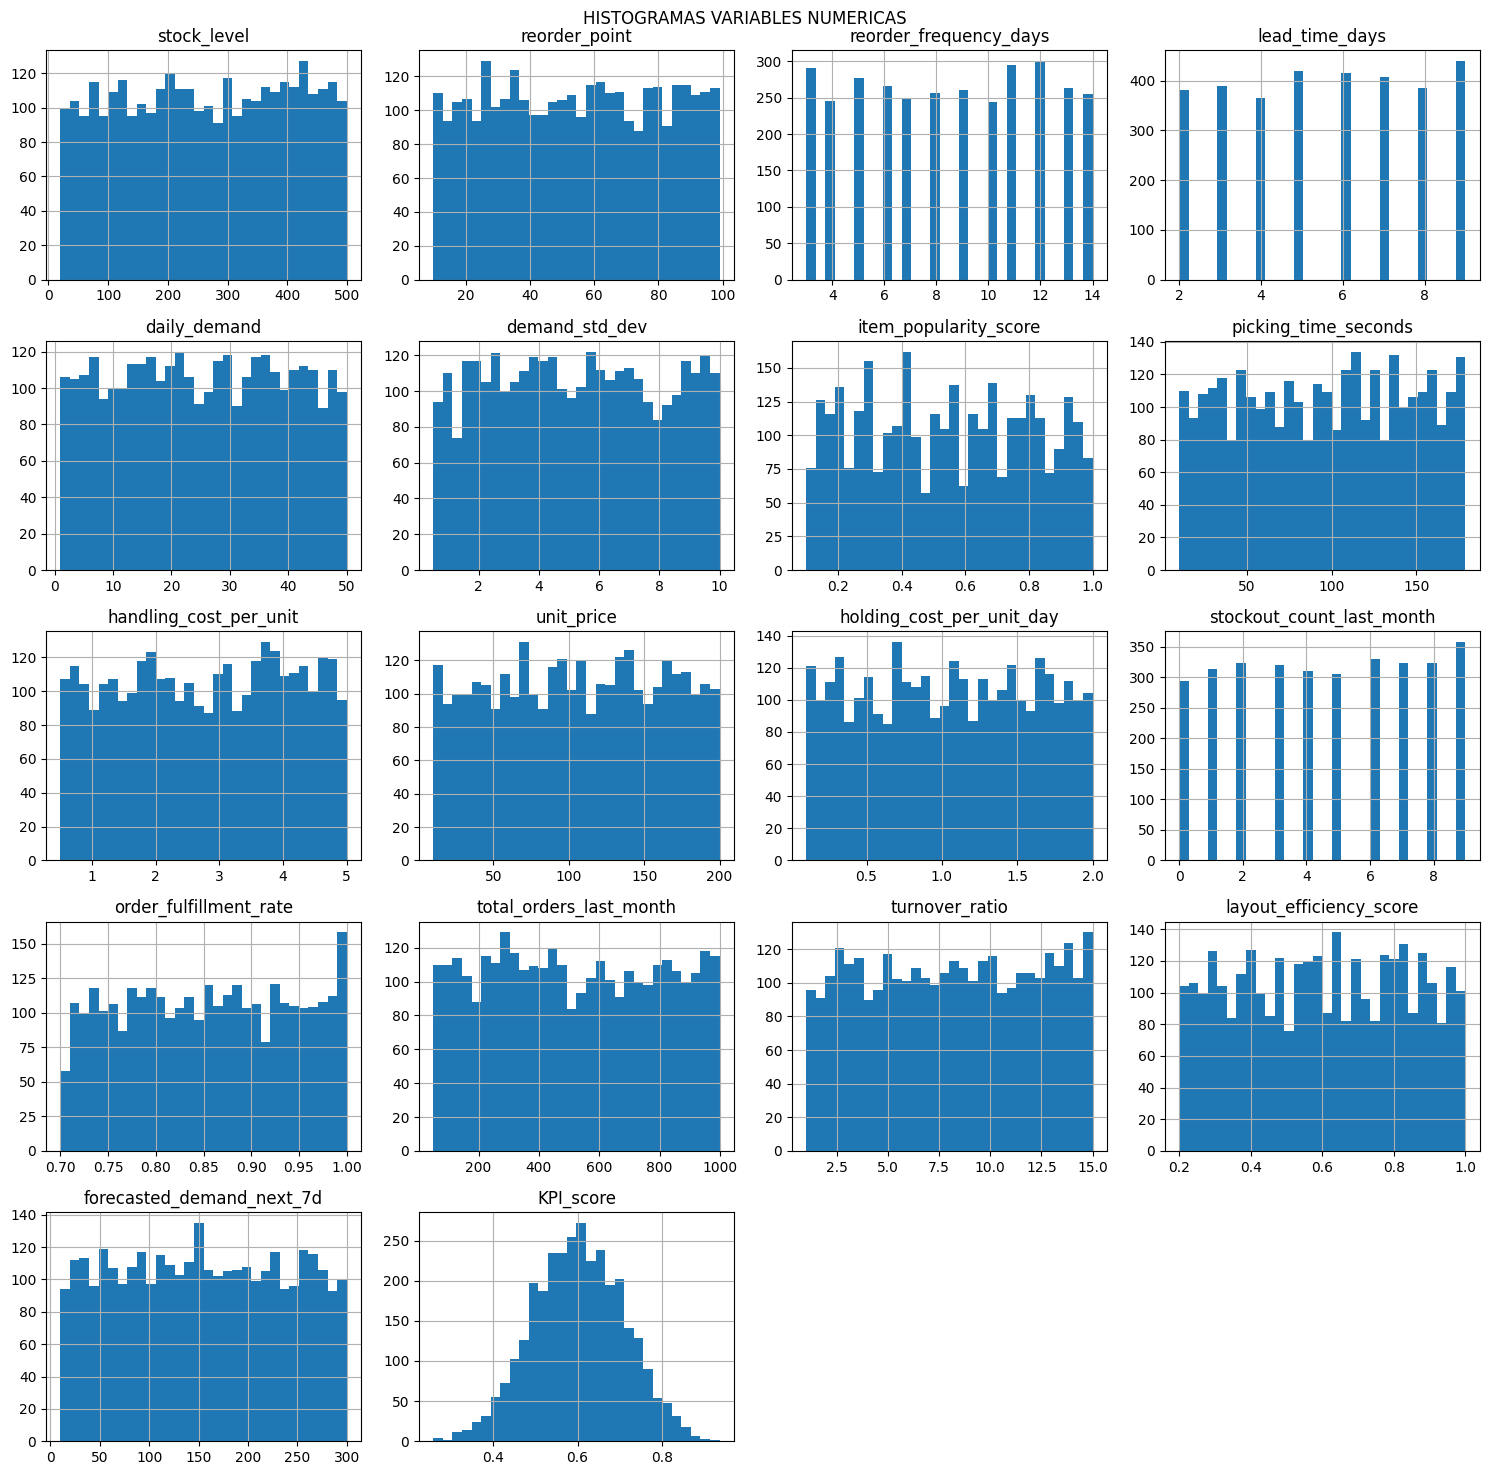

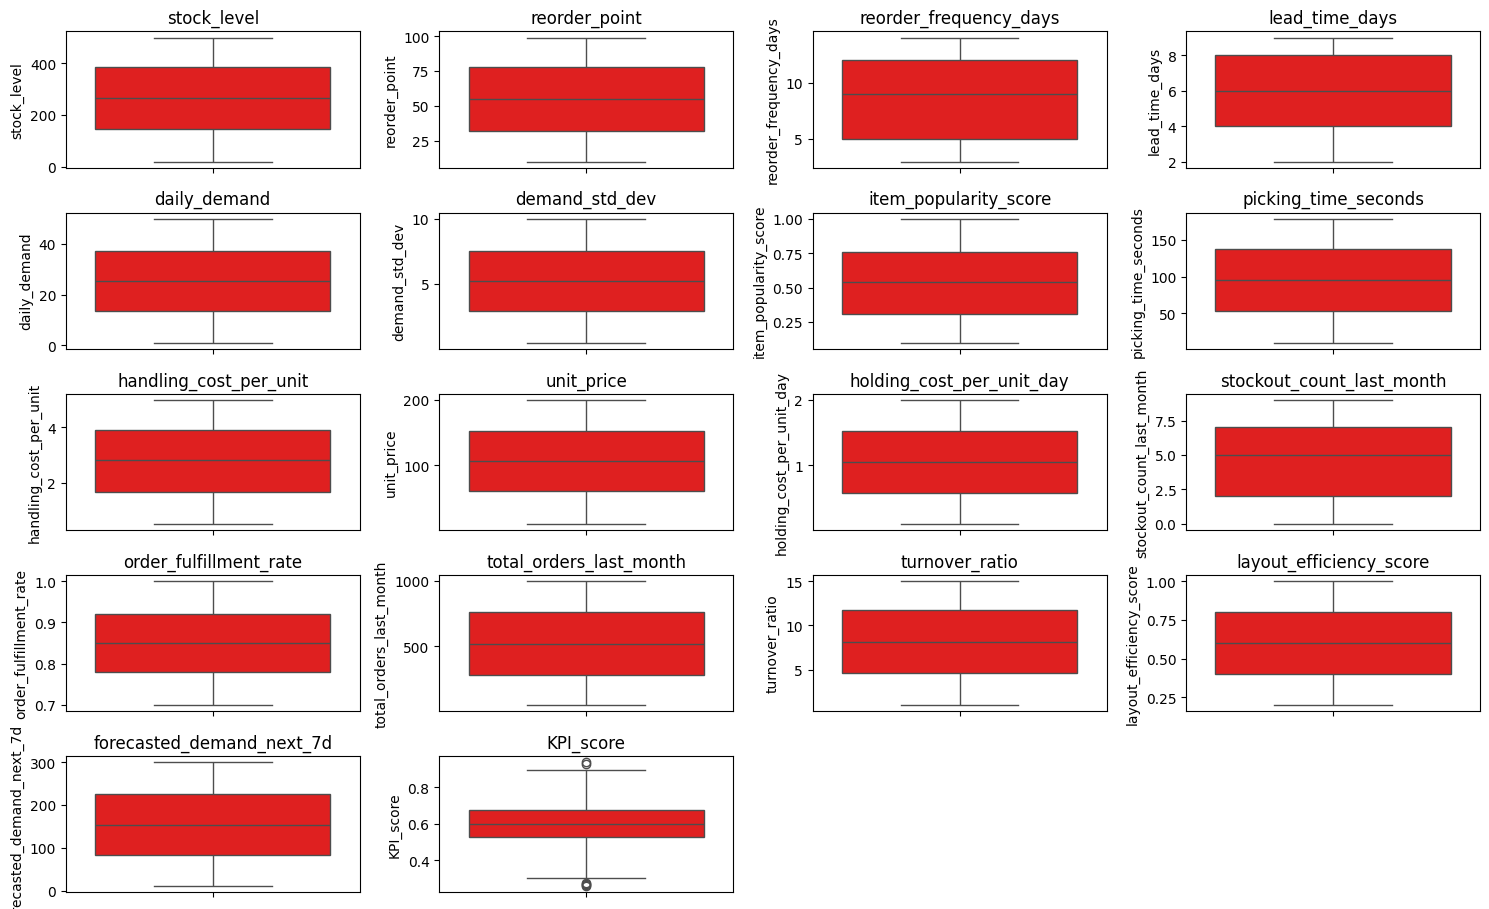

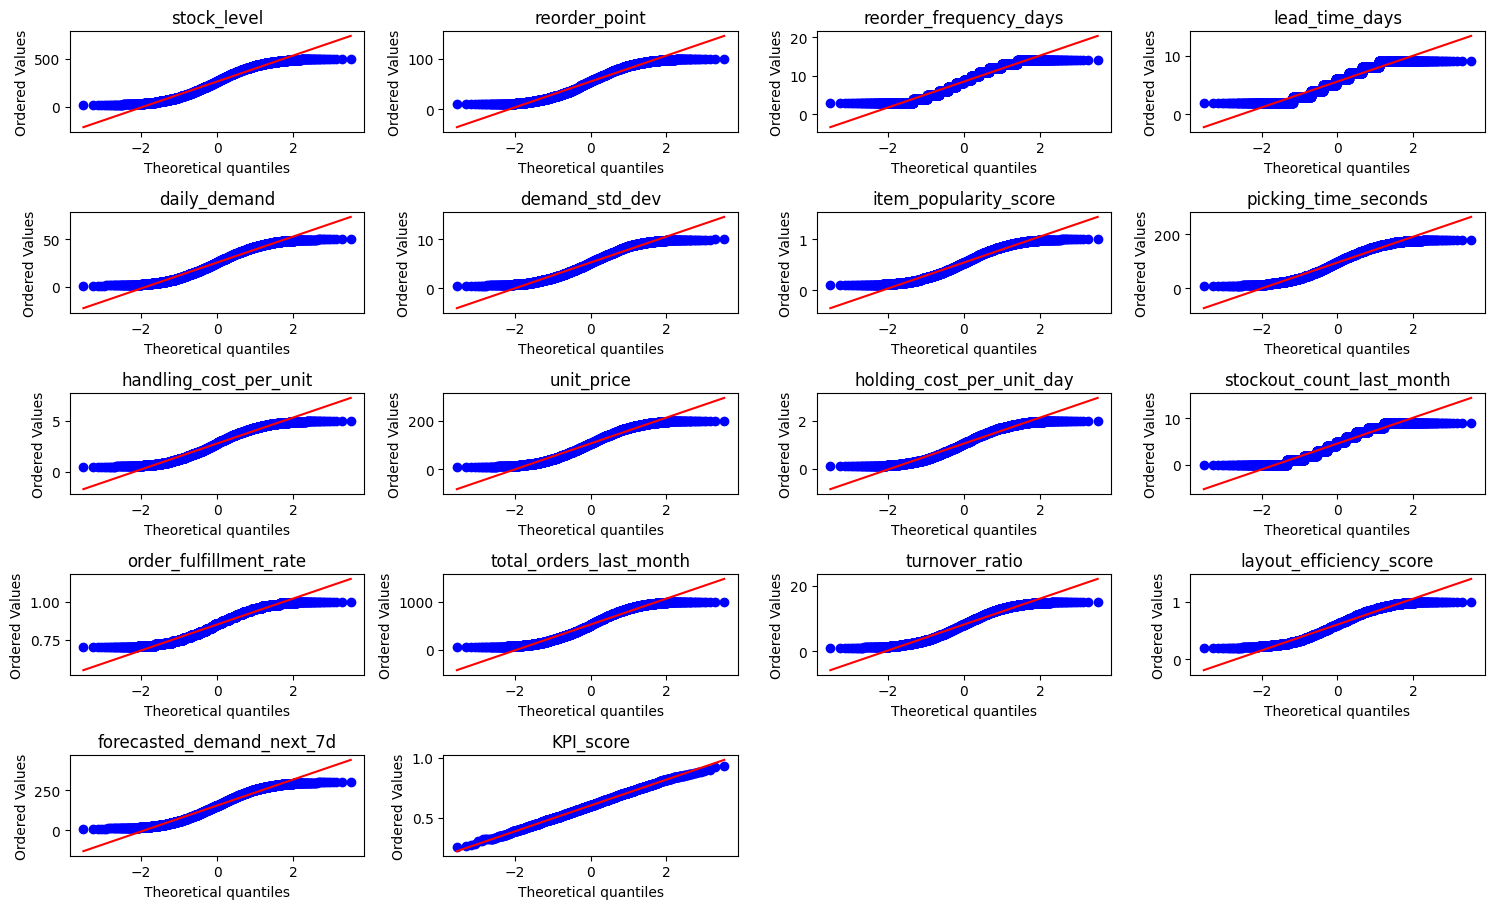

In [25]:
# Interpretación de distribuciones de las variables numéricas
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICA")
import numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
import math
import scipy.stats as stats

# Histogramas
datasetOriginalNumberColumns = datasetOriginal.select_dtypes(include=[numpy.number])
datasetOriginalNumberColumns.info()

pyplot.figure(figsize=(15,10))
datasetOriginalNumberColumns.hist(bins = 30, figsize = (15,15))
pyplot.suptitle("HISTOGRAMAS VARIABLES NUMERICAS")
pyplot.tight_layout()
pyplot.show()

# Diagrama de bigotes
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    sns.boxplot(data = datasetOriginalNumberColumns[column], color = 'red')
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

# QQ Plots
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    stats.probplot(datasetOriginalNumberColumns[column], plot=pyplot, dist="norm")
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

In [26]:
#Interpretación de las distribuciones de las variables categoricas
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS")

datasetOriginal.apply(pandas.unique)

#Interpretación de las distribuciones de las variables categóricas:
#Se identificaron las variables categóricas del dataset y sus posibles usos analíticos.
# Las variables category y zone presentan pocas categorías, por lo que son útiles para comparar el rendimiento logístico entre grupos de productos o zonas operativas.
# Variables como item_id y storage_location_id tienen valores únicos que las identifican, pero no aportan valor analítico directo.
# Finalmente, last_restock_date evidencia fechas de reposición distribuidas durante todo el año 2024, reflejando un proceso de abastecimiento constante.

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS


item_id                      [ITM10000, ITM10001, ITM10002, ITM10003, ITM10...
category                     [Pharma, Automotive, Groceries, Apparel, Elect...
stock_level                  [283, 301, 132, 346, 49, 154, 86, 84, 311, 44,...
reorder_point                [21, 52, 60, 46, 55, 62, 97, 89, 22, 98, 63, 6...
reorder_frequency_days               [4, 9, 11, 13, 6, 7, 3, 14, 5, 8, 10, 12]
lead_time_days                                        [4, 6, 8, 5, 9, 2, 7, 3]
daily_demand                 [49.85, 23.34, 37.69, 33.69, 49.58, 35.95, 9.0...
demand_std_dev               [1.56, 2.55, 3.15, 2.79, 5.23, 9.47, 4.72, 6.7...
item_popularity_score        [0.43, 0.69, 0.62, 0.21, 0.31, 0.41, 0.28, 0.2...
storage_location_id          [L82, L15, L4, L95, L36, L32, L29, L18, L14, L...
zone                                                              [B, A, D, C]
picking_time_seconds         [106, 45, 177, 39, 35, 94, 110, 130, 40, 26, 1...
handling_cost_per_unit       [3.61, 3.54, 0.52, 2.64

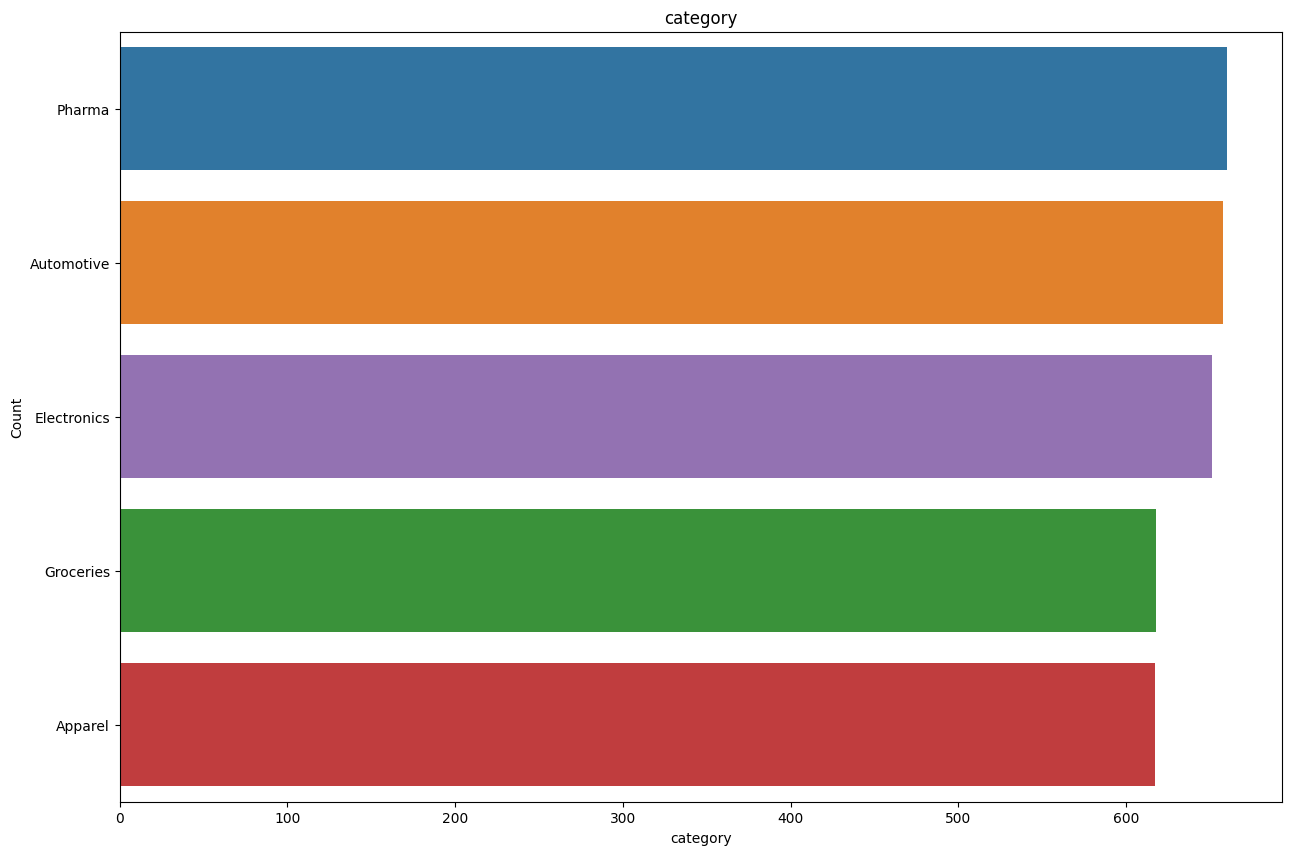

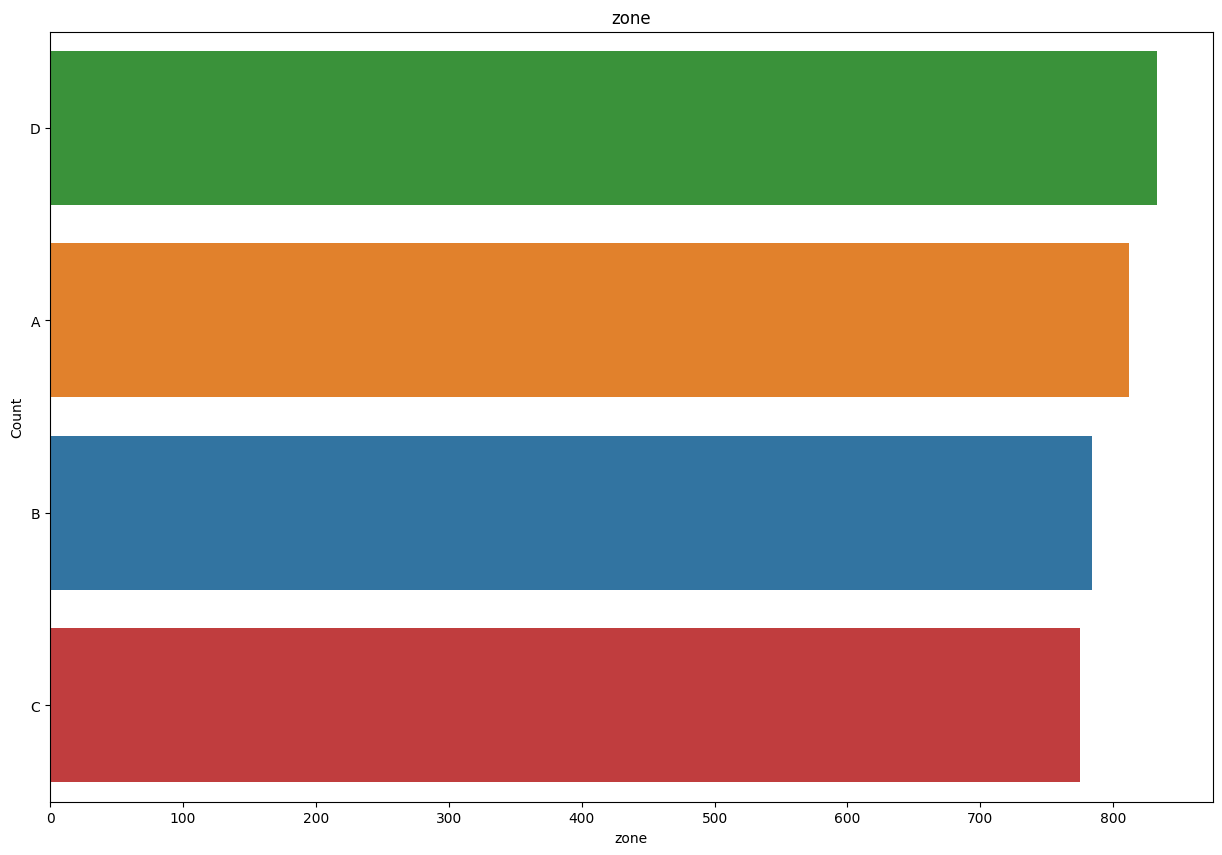

In [28]:
# Eliminando columnas numéricas
datasetOriginalCategoryColumns = datasetOriginal.drop(columns = ['stock_level','reorder_point','reorder_frequency_days','lead_time_days','daily_demand','demand_std_dev','item_popularity_score','picking_time_seconds','handling_cost_per_unit','unit_price','holding_cost_per_unit_day','stockout_count_last_month','order_fulfillment_rate','total_orders_last_month','turnover_ratio','layout_efficiency_score','forecasted_demand_next_7d','KPI_score'])

# Variable categórica 'Category'
pyplot.figure(figsize=(15,10))
sns.countplot(y = datasetOriginal['category'], data = datasetOriginal, order=datasetOriginal['category'].value_counts().index, hue='category', dodge=False)
pyplot.title('category')
pyplot.xlabel('category')
pyplot.ylabel('Count')
pyplot.show()

# Variable categórica 'Zone'
pyplot.figure(figsize=(15,10))
sns.countplot(y = datasetOriginal['zone'], data = datasetOriginal, order=datasetOriginal['zone'].value_counts().index, hue='zone', dodge=False)
pyplot.title('zone')
pyplot.xlabel('zone')
pyplot.ylabel('Count')
pyplot.show()

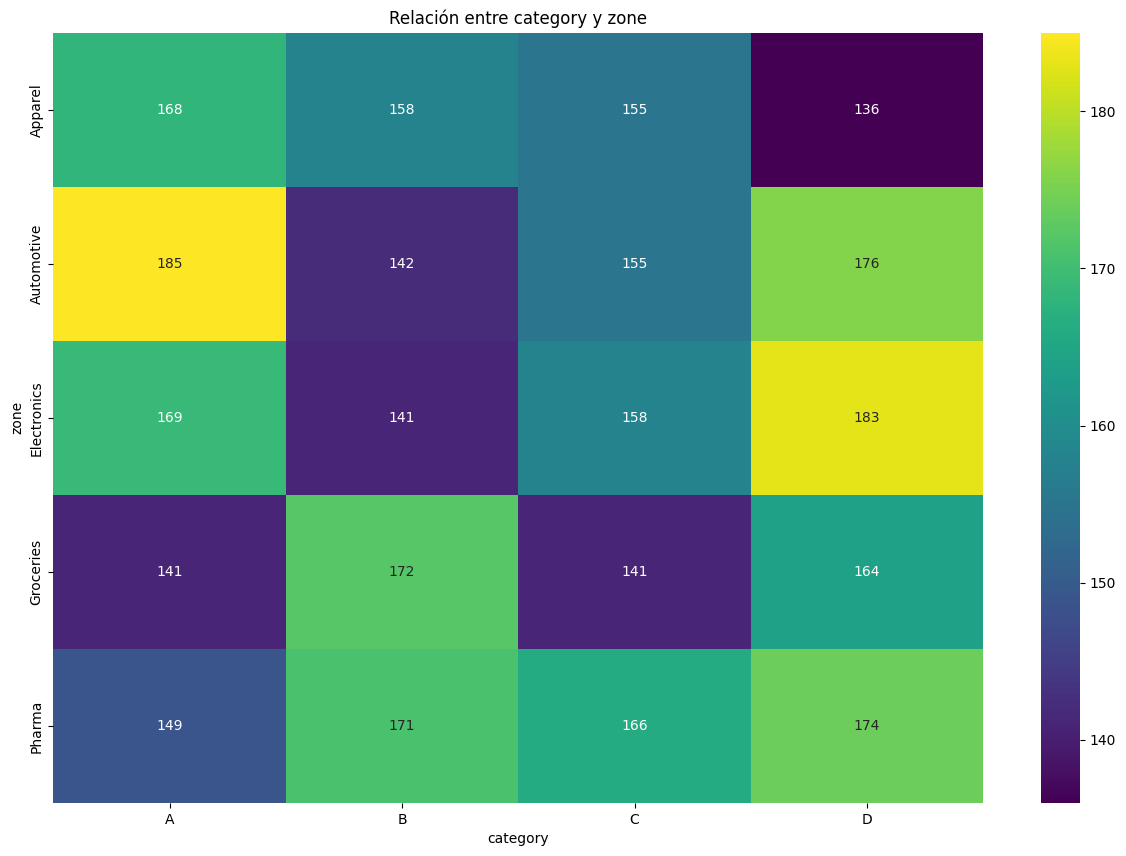

In [29]:
# Contar el numero de similitudes entre 2 columnas
cross_table = pandas.crosstab(datasetOriginalCategoryColumns['category'], datasetOriginalCategoryColumns['zone'])
pyplot.figure(figsize=(15,10))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre category y zone')
pyplot.xlabel('category')
pyplot.ylabel('zone')
pyplot.show()

In [31]:
# Revisión de datos faltantes
datasetOriginal.isnull().sum()

#NO SE PRESENTAN VALORES NULOS

item_id                      0
category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
storage_location_id          0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

In [32]:
# Revision datos faltantes
#   Manejo de datos faltantes

datasetOriginalClean = datasetOriginal.copy()
datasetOriginalClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float